[Mask 1] Selected 10 features, F1-Score Mean: 0.8241, Std: 0.0220
[Mask 1] Selected 20 features, F1-Score Mean: 0.8003, Std: 0.0396
[Mask 1] Selected 30 features, F1-Score Mean: 0.8512, Std: 0.0341
[Mask 1] Selected 40 features, F1-Score Mean: 0.8407, Std: 0.0267
[Mask 1] Selected 50 features, F1-Score Mean: 0.8425, Std: 0.0282
[Mask 1] Selected 60 features, F1-Score Mean: 0.8652, Std: 0.0474
[Mask 1] Selected 70 features, F1-Score Mean: 0.8805, Std: 0.0415
[Mask 1] Selected 80 features, F1-Score Mean: 0.8780, Std: 0.0476
[Mask 1] Selected 90 features, F1-Score Mean: 0.8735, Std: 0.0394
[Mask 1] Selected 100 features, F1-Score Mean: 0.8763, Std: 0.0395
[Mask 2] Selected 10 features, F1-Score Mean: 0.7594, Std: 0.0332
[Mask 2] Selected 20 features, F1-Score Mean: 0.7794, Std: 0.0170
[Mask 2] Selected 30 features, F1-Score Mean: 0.7879, Std: 0.0471
[Mask 2] Selected 40 features, F1-Score Mean: 0.8055, Std: 0.0271
[Mask 2] Selected 50 features, F1-Score Mean: 0.8038, Std: 0.0333
[Mask 2] 

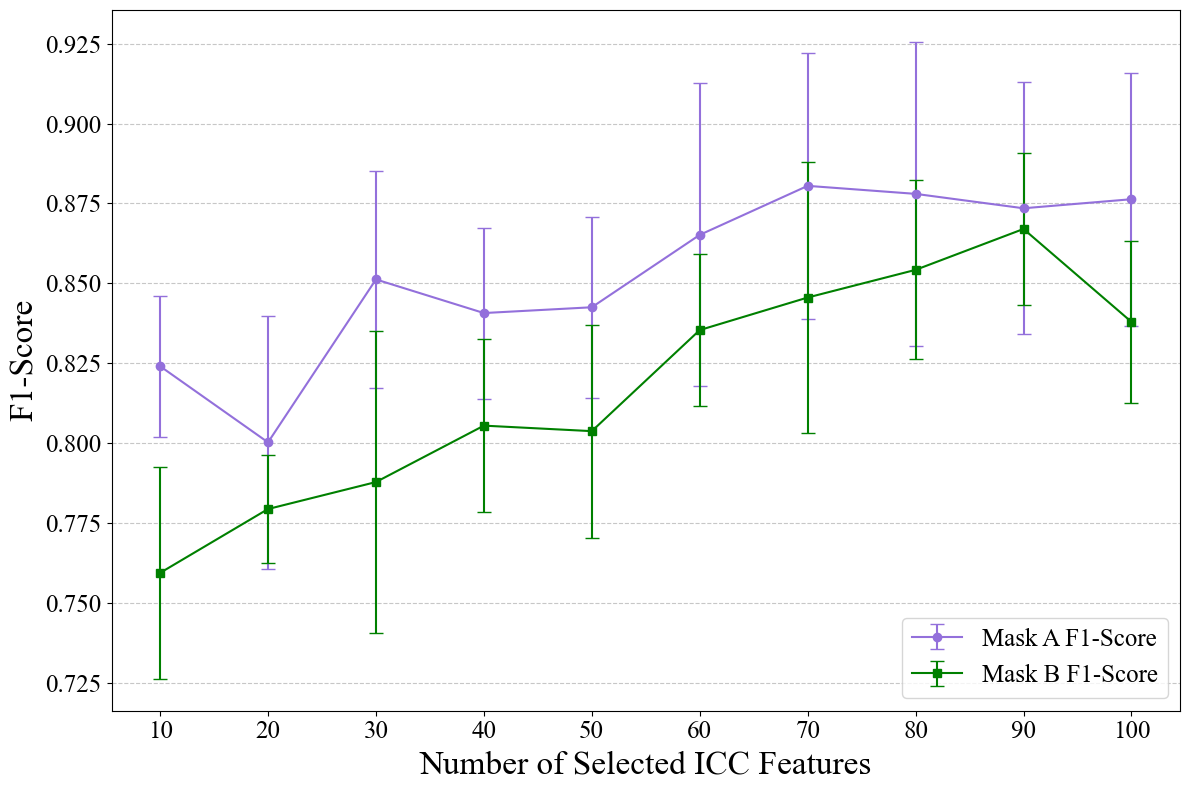

In [ ]:
# Random Forest
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the global default font to Times New Roman
rcParams['font.family'] = 'Times New Roman'

# 1. Read the feature importance file and complete data file for the first mask
importance_file_1 = "D:/Apple/survival analysis/survival analysis/APPLE/t1+t1Gd+t2+flair/1_1_calculate icc/Total_GBM+LGG_t1+t2+t2Gd+flair_s+s1_ICC.csv"
data_file_1 = "D:/Apple/survival analysis/survival analysis/APPLE/t1+t1Gd+t2+flair/1_2_select icc/Total_GBM+LGG_t1+t2+t2Gd+flair_s_ICC_all_secect_icc.csv"

# Read the feature importance file and complete data file for the second mask
importance_file_2 = "D:/Apple/survival analysis/survival analysis/APPLE/t1+t1Gd+t2+flair/1_1_calculate icc/Total_GBM+LGG_t1+t2+t2Gd+flair_s+s1_ICC.csv"
data_file_2 = "D:/Apple/survival analysis/survival analysis/APPLE/t1+t1Gd+t2+flair/1_2_select icc/Total_GBM+LGG_t1+t2+t2Gd+flair_s1_ICC_all_secect_icc.csv"

# Load the data
importance_data_1 = pd.read_csv(importance_file_1)
data_1 = pd.read_csv(data_file_1)

importance_data_2 = pd.read_csv(importance_file_2)
data_2 = pd.read_csv(data_file_2)

# 2. Sort by feature importance and extract ICC features
importance_data_1 = importance_data_1.sort_values(by="icc", ascending=False)
icc_features_1 = importance_data_1["FeatureName"].values

importance_data_2 = importance_data_2.sort_values(by="icc", ascending=False)
icc_features_2 = importance_data_2["FeatureName"].values

# 3. Define the number of features to select
feature_counts = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# 4. Initialize lists to store the mean and standard deviation of F1-Scores
f1_means_1 = []
f1_stds_1 = []

f1_means_2 = []
f1_stds_2 = []

# 5. Iterate over each feature count, train and test the model using 5-fold cross-validation (first mask)
for count in feature_counts:
    # Select the top `count` ICC features
    selected_features = icc_features_1[:count]
    
    # Select these features from the complete dataset
    X = data_1[selected_features]
    y = data_1["label"]
    
    # Initialize the Random Forest model
    model = RandomForestClassifier(n_estimators=300, random_state=42)
    
    # Compute F1-Score using 5-fold cross-validation
    f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    
    # Compute the mean and standard deviation of F1-Score
    f1_mean = np.mean(f1_scores)
    f1_std = np.std(f1_scores)
    f1_means_1.append(f1_mean)
    f1_stds_1.append(f1_std)
    
    # Output the current number of selected features and the corresponding mean and standard deviation of F1-Score
    print(f"[Mask 1] Selected {count} features, F1-Score Mean: {f1_mean:.4f}, Std: {f1_std:.4f}")

# 6. Iterate over each feature count, train and test the model using 5-fold cross-validation (second mask)
for count in feature_counts:
    # Select the top `count` ICC features
    selected_features = icc_features_2[:count]
    
    # Select these features from the complete dataset
    X = data_2[selected_features]
    y = data_2["label"]
    
    # Initialize the Random Forest model
    model = RandomForestClassifier(n_estimators=300, random_state=42)
    
    # Compute F1-Score using 5-fold cross-validation
    f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    
    # Compute the mean and standard deviation of F1-Score
    f1_mean = np.mean(f1_scores)
    f1_std = np.std(f1_scores)
    f1_means_2.append(f1_mean)
    f1_stds_2.append(f1_std)
    
    # Output the current number of selected features and the corresponding mean and standard deviation of F1-Score
    print(f"[Mask 2] Selected {count} features, F1-Score Mean: {f1_mean:.4f}, Std: {f1_std:.4f}")

# 7. Plot the line chart with error bars
plt.figure(figsize=(12, 8))
plt.errorbar(feature_counts, f1_means_1, yerr=f1_stds_1, fmt='-o', capsize=5, color='mediumpurple', label="Mask A F1-Score")
plt.errorbar(feature_counts, f1_means_2, yerr=f1_stds_2, fmt='-s', capsize=5, color='green', label="Mask B F1-Score")
plt.xlabel("Number of Selected ICC Features", fontsize=24)
plt.ylabel("F1-Score", fontsize=24)
#plt.title("F1-Score vs Number of Selected ICC Features (with Error Bars)", fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(feature_counts, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='lower right', fontsize=18)
plt.tight_layout()
plt.show()

[Mask 1] Selected 10 features, F1-Score Mean: 0.7958, Std: 0.0529
[Mask 1] Selected 20 features, F1-Score Mean: 0.8364, Std: 0.0464
[Mask 1] Selected 30 features, F1-Score Mean: 0.8388, Std: 0.0636
[Mask 1] Selected 40 features, F1-Score Mean: 0.8348, Std: 0.0248
[Mask 1] Selected 50 features, F1-Score Mean: 0.8523, Std: 0.0380
[Mask 1] Selected 60 features, F1-Score Mean: 0.8432, Std: 0.0459
[Mask 1] Selected 70 features, F1-Score Mean: 0.8390, Std: 0.0262
[Mask 1] Selected 80 features, F1-Score Mean: 0.8199, Std: 0.0305
[Mask 1] Selected 90 features, F1-Score Mean: 0.8391, Std: 0.0367
[Mask 1] Selected 100 features, F1-Score Mean: 0.8369, Std: 0.0385
[Mask 2] Selected 10 features, F1-Score Mean: 0.7771, Std: 0.0392
[Mask 2] Selected 20 features, F1-Score Mean: 0.7910, Std: 0.0352
[Mask 2] Selected 30 features, F1-Score Mean: 0.7980, Std: 0.0357
[Mask 2] Selected 40 features, F1-Score Mean: 0.8121, Std: 0.0542
[Mask 2] Selected 50 features, F1-Score Mean: 0.8073, Std: 0.0273
[Mask 2] 

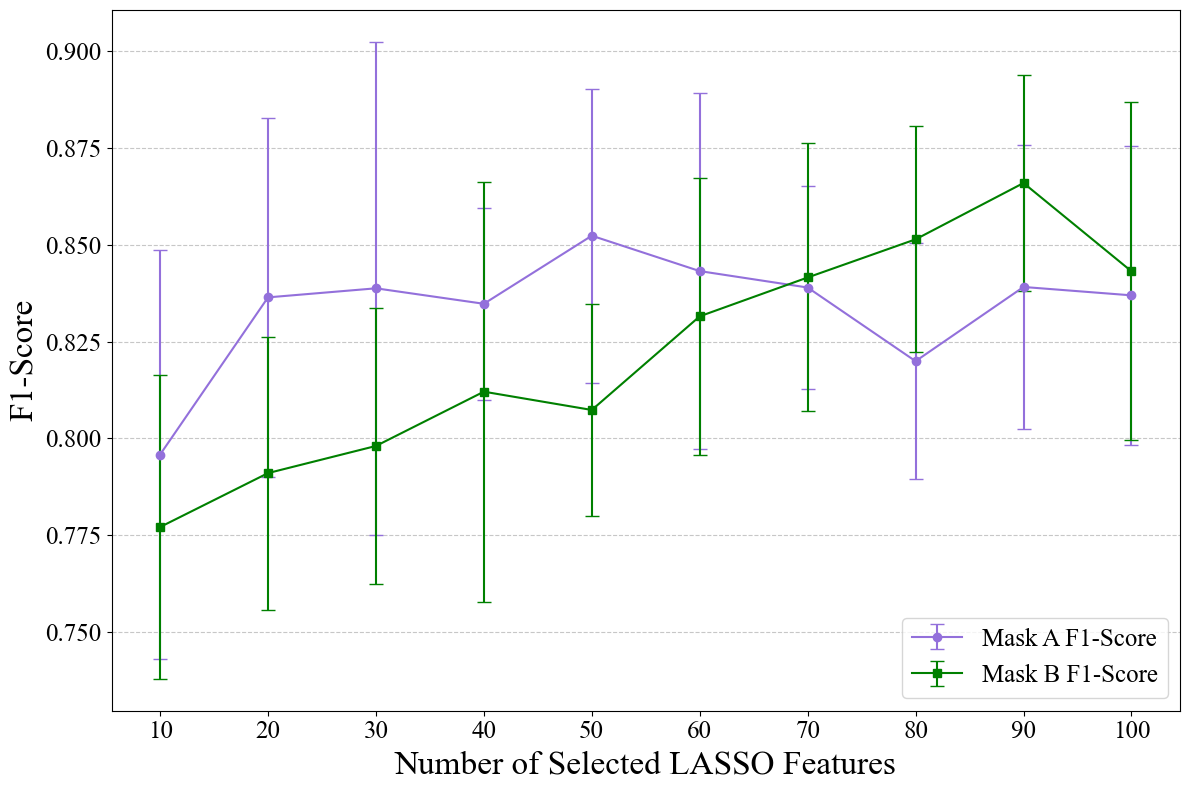

In [ ]:
# Random Forest
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the global default font to Times New Roman
rcParams['font.family'] = 'Times New Roman'

# 1. Read the feature importance file and complete data file for the first mask
importance_file_1 = "D:/Apple/survival analysis/survival analysis/APPLE/t1+t1Gd+t2+flair/2_3_lasso_feature_divide_train_test/classification_lasso/csv/T1+T2+T1GD+flair_s_Lasso_feature_importances.csv"
data_file_1 = "D:/Apple/survival analysis/survival analysis/APPLE/t1+t1Gd+t2+flair/2_3_lasso_feature_divide_train_test/classification_lasso/two file_lasso_5_fold/Total_GBM+LGG_T1+T2+T1GD+flair_s_add_os_age_gender_label_selsect_lasso_classification.csv"

# Read the feature importance file and complete data file for the second mask
importance_file_2 = "D:/Apple/survival analysis/survival analysis/APPLE/t1+t1Gd+t2+flair/2_3_lasso_feature_divide_train_test/classification_lasso/csv/T1+T2+T1GD+flair_s1_Lasso_feature_importances.csv"
data_file_2 = "D:/Apple/survival analysis/survival analysis/APPLE/t1+t1Gd+t2+flair/2_3_lasso_feature_divide_train_test/classification_lasso/two file_lasso_5_fold/Total_GBM+LGG_T1+T2+T1GD+flair_s1_add_os_age_gender_label_selsect_lasso_classification.csv"

# Load the data
importance_data_1 = pd.read_csv(importance_file_1)
data_1 = pd.read_csv(data_file_1)

importance_data_2 = pd.read_csv(importance_file_2)
data_2 = pd.read_csv(data_file_2)

# 2. Sort by feature importance and extract ICC features
importance_data_1 = importance_data_1.sort_values(by="Importance", ascending=False)
icc_features_1 = importance_data_1["Feature Name"].values

importance_data_2 = importance_data_2.sort_values(by="Importance", ascending=False)
icc_features_2 = importance_data_2["Feature Name"].values

# 3. Define the number of features to select
feature_counts = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# 4. Initialize lists to store the mean and standard deviation of F1-Scores
f1_means_1 = []
f1_stds_1 = []

f1_means_2 = []
f1_stds_2 = []

# 5. Iterate over each feature count, train and test the model using 5-fold cross-validation (first mask)
for count in feature_counts:
    # Select the top `count` ICC features
    selected_features = icc_features_1[:count]
    
    # Select these features from the complete dataset
    X = data_1[selected_features]
    y = data_1["label"]
    
    # Initialize the Random Forest model
    model = RandomForestClassifier(n_estimators=300, random_state=42)
    
    # Compute F1-Score using 5-fold cross-validation
    f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    
    # Compute the mean and standard deviation of F1-Score
    f1_mean = np.mean(f1_scores)
    f1_std = np.std(f1_scores)
    f1_means_1.append(f1_mean)
    f1_stds_1.append(f1_std)
    
    # Output the current number of selected features and the corresponding mean and standard deviation of F1-Score
    print(f"[Mask 1] Selected {count} features, F1-Score Mean: {f1_mean:.4f}, Std: {f1_std:.4f}")

# 6. Iterate over each feature count, train and test the model using 5-fold cross-validation (second mask)
for count in feature_counts:
    # Select the top `count` ICC features
    selected_features = icc_features_2[:count]
    
    # Select these features from the complete dataset
    X = data_2[selected_features]
    y = data_2["label"]
    
    # Initialize the Random Forest model
    model = RandomForestClassifier(n_estimators=300, random_state=42)
    
    # Compute F1-Score using 5-fold cross-validation
    f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    
    # Compute the mean and standard deviation of F1-Score
    f1_mean = np.mean(f1_scores)
    f1_std = np.std(f1_scores)
    f1_means_2.append(f1_mean)
    f1_stds_2.append(f1_std)
    
    # Output the current number of selected features and the corresponding mean and standard deviation of F1-Score
    print(f"[Mask 2] Selected {count} features, F1-Score Mean: {f1_mean:.4f}, Std: {f1_std:.4f}")

# 7. Plot the line chart with error bars
plt.figure(figsize=(12, 8))
plt.errorbar(feature_counts, f1_means_1, yerr=f1_stds_1, fmt='-o', capsize=5, color='mediumpurple', label="Mask A F1-Score")
plt.errorbar(feature_counts, f1_means_2, yerr=f1_stds_2, fmt='-s', capsize=5, color='green', label="Mask B F1-Score")
plt.xlabel("Number of Selected LASSO Features", fontsize=24)
plt.ylabel("F1-Score", fontsize=24)
#plt.title("F1-Score vs Number of Selected LASSO Features (with Error Bars)", fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(feature_counts, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='lower right', fontsize=18)
plt.tight_layout()
plt.show()

In [ ]:
# Random Forest
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the global default font to Times New Roman
rcParams['font.family'] = 'Times New Roman'

# 1. Read the feature importance file and training/testing data for the first mask
importance_file_1 = "D:/Apple/survival analysis/survival analysis/APPLE/t1+t1Gd+t2+flair/2_3_lasso_feature_divide_train_test/survive_lasso/csv/T1+T2+T1GD+flair_s_Lasso_feature_importances.csv"
train_file_1 = "D:/Apple/survival analysis/survival analysis/APPLE/t1+t1Gd+t2+flair/2_3_lasso_feature_divide_train_test/survive_lasso/Total_GBM+LGG_T1+T2+T1GD+flair_s_add_os_age_gender_label_train_selsect_survive_lasso.csv"
test_file_1 = "D:/Apple/survival analysis/survival analysis/APPLE/t1+t1Gd+t2+flair/2_3_lasso_feature_divide_train_test/survive_lasso/Total_GBM+LGG_T1+T2+T1GD+flair_s_add_os_age_gender_label_test_selsect_survive_lasso.csv"

# Read the feature importance file and training/testing data for the second mask
importance_file_2 = "D:/Apple/survival analysis/survival analysis/APPLE/t1+t1Gd+t2+flair/2_3_lasso_feature_divide_train_test/survive_lasso/csv/T1+T2+T1GD+flair_s1_Lasso_feature_importances.csv"
train_file_2 = "D:/Apple/survival analysis/survival analysis/APPLE/t1+t1Gd+t2+flair/2_3_lasso_feature_divide_train_test/survive_lasso/Total_GBM+LGG_T1+T2+T1GD+flair_s1_add_os_age_gender_label_train_selsect_survive_lasso.csv"
test_file_2 = "D:/Apple/survival analysis/survival analysis/APPLE/t1+t1Gd+t2+flair/2_3_lasso_feature_divide_train_test/survive_lasso/Total_GBM+LGG_T1+T2+T1GD+flair_s1_add_os_age_gender_label_test_selsect_survive_lasso.csv"

# Load the data
importance_data_1 = pd.read_csv(importance_file_1)
train_data_1 = pd.read_csv(train_file_1)
test_data_1 = pd.read_csv(test_file_1)

importance_data_2 = pd.read_csv(importance_file_2)
train_data_2 = pd.read_csv(train_file_2)
test_data_2 = pd.read_csv(test_file_2)

# 2. Sort by feature importance and extract ICC features
importance_data_1 = importance_data_1.sort_values(by="Importance", ascending=False)
icc_features_1 = importance_data_1["Feature Name"].values

importance_data_2 = importance_data_2.sort_values(by="Importance", ascending=False)
icc_features_2 = importance_data_2["Feature Name"].values

# 3. Define the number of features to select
feature_counts = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# 4. Initialize lists to store F1-Scores
f1_scores_1 = []
f1_scores_2 = []

# 5. Iterate over each feature count, train and test the model (first mask)
for count in feature_counts:
    # Select the top `count` ICC features
    selected_features = icc_features_1[:count]
    
    # Select these features from the training and testing data
    X_train = train_data_1[selected_features]
    y_train = train_data_1["long_or_short"]
    X_test = test_data_1[selected_features]
    y_test = test_data_1["long_or_short"]
    
    # Initialize and train the Random Forest model
    model = RandomForestClassifier(n_estimators=300, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict and compute F1-Score
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores_1.append(f1)
    
    # Output the current number of selected features and the corresponding F1-Score
    print(f"[Mask 1] Selected {count} features, F1-Score: {f1:.4f}")

# 6. Iterate over each feature count, train and test the model (second mask)
for count in feature_counts:
    # Select the top `count` ICC features
    selected_features = icc_features_2[:count]
    
    # Select these features from the training and testing data
    X_train = train_data_2[selected_features]
    y_train = train_data_2["long_or_short"]
    X_test = test_data_2[selected_features]
    y_test = test_data_2["long_or_short"]
    
    # Initialize and train the Random Forest model
    model = RandomForestClassifier(n_estimators=300, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict and compute F1-Score
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores_2.append(f1)
    
    # Output the current number of selected features and the corresponding F1-Score
    print(f"[Mask 2] Selected {count} features, F1-Score: {f1:.4f}")

# 7. Plot the F1-Score line chart
plt.figure(figsize=(12, 8))
plt.plot(feature_counts, f1_scores_1, marker='o', color='mediumpurple', label="Mask 1 F1-Score")
plt.plot(feature_counts, f1_scores_2, marker='s', color='green', label="Mask 2 F1-Score")
plt.xlabel("Number of Selected LASSO Features", fontsize=16)
plt.ylabel("F1-Score", fontsize=16)
plt.title("F1-Score vs Number of Selected LASSO Features", fontsize=18)
plt.grid(True)
plt.legend(fontsize=14)
plt.show()

In [ ]:
# Random Forest
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from lifelines.utils import concordance_index
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the global default font to Times New Roman
rcParams['font.family'] = 'Times New Roman'

# 1. Read the feature importance file and training/testing data for the first mask
importance_file_1 = "D:/Apple/survival analysis/survival analysis/APPLE/t1+t1Gd+t2+flair/2_3_lasso_feature_divide_train_test/survive_lasso/csv/T1+T2+T1GD+flair_s_Lasso_feature_importances.csv"
train_file_1 = "D:/Apple/survival analysis/survival analysis/APPLE/t1+t1Gd+t2+flair/2_3_lasso_feature_divide_train_test/survive_lasso/Total_GBM+LGG_T1+T2+T1GD+flair_s_add_os_age_gender_label_train_selsect_survive_lasso.csv"
test_file_1 = "D:/Apple/survival analysis/survival analysis/APPLE/t1+t1Gd+t2+flair/2_3_lasso_feature_divide_train_test/survive_lasso/Total_GBM+LGG_T1+T2+T1GD+flair_s_add_os_age_gender_label_test_selsect_survive_lasso.csv"

# Read the feature importance file and training/testing data for the second mask
importance_file_2 = "D:/Apple/survival analysis/survival analysis/APPLE/t1+t1Gd+t2+flair/2_3_lasso_feature_divide_train_test/survive_lasso/csv/T1+T2+T1GD+flair_s1_Lasso_feature_importances.csv"
train_file_2 = "D:/Apple/survival analysis/survival analysis/APPLE/t1+t1Gd+t2+flair/2_3_lasso_feature_divide_train_test/survive_lasso/Total_GBM+LGG_T1+T2+T1GD+flair_s1_add_os_age_gender_label_train_selsect_survive_lasso.csv"
test_file_2 = "D:/Apple/survival analysis/survival analysis/APPLE/t1+t1Gd+t2+flair/2_3_lasso_feature_divide_train_test/survive_lasso/Total_GBM+LGG_T1+T2+T1GD+flair_s1_add_os_age_gender_label_test_selsect_survive_lasso.csv"

# Load the data
train_data_1 = pd.read_csv(train_file_1)
test_data_1 = pd.read_csv(test_file_1)

train_data_2 = pd.read_csv(train_file_2)
test_data_2 = pd.read_csv(test_file_2)

# Load the LASSO feature importance files
importance_data_1 = pd.read_csv(importance_file_1)
importance_data_2 = pd.read_csv(importance_file_2)

# Sort by LASSO importance values
importance_data_1 = importance_data_1.sort_values(by="Importance", ascending=False)
importance_data_2 = importance_data_2.sort_values(by="Importance", ascending=False)

# Extract feature names
lasso_features_1 = importance_data_1["Feature Name"].values
lasso_features_2 = importance_data_2["Feature Name"].values

# Define the number of features to select
feature_counts = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Initialize lists to store c-index values
c_indices_1 = []
c_indices_2 = []

# Iterate over each feature count, train and test the model (first mask)
for count in feature_counts:
    # Select the top `count` LASSO features and include the label column
    selected_features = list(lasso_features_1[:count]) + ["label"]
    print(selected_features)
    
    # Select these features from the training and testing data
    X_train = train_data_1[selected_features]
    y_train = train_data_1["OS"]
    X_test = test_data_1[selected_features]
    T_test = test_data_1["OS.time"]
    E_test = test_data_1["OS"]
    
    # Initialize and train the Random Forest model
    model = RandomForestClassifier(n_estimators=500, random_state=42, criterion='entropy')
    model.fit(X_train, y_train)

    # Predict probabilities and compute c-index
    predicted_probabilities = model.predict_proba(X_test)[:, 1]
    print(predicted_probabilities)
    probs = model.predict(X_test)
    print(probs)
    print(np.mean(probs == E_test))
    c_index = concordance_index(T_test, -predicted_probabilities, E_test)
    c_indices_1.append(c_index)

    # Output the current number of selected features and the corresponding c-index
    print(f"[Mask 1] Selected {count} features (including label), c-index: {c_index:.4f}")

# Iterate over each feature count, train and test the model (second mask)
for count in feature_counts:
    # Select the top `count` LASSO features and include the label column
    selected_features = list(lasso_features_2[:count]) + ["label"]
    
    # Select these features from the training and testing data
    X_train = train_data_2[selected_features]
    y_train = train_data_2["OS"]
    X_test = test_data_2[selected_features]
    T_test = test_data_2["OS.time"]
    E_test = test_data_2["OS"]

    # Initialize and train the Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=21, criterion='entropy')
    model.fit(X_train, y_train)

    # Predict probabilities and compute c-index
    predicted_probabilities = model.predict_proba(X_test)[:, 1]
    c_index = concordance_index(T_test, -predicted_probabilities, E_test)
    c_indices_2.append(c_index)

    # Output the current number of selected features and the corresponding c-index
    print(f"[Mask 2] Selected {count} features (including label), c-index: {c_index:.4f}")

# Plot the c-index line chart
plt.figure(figsize=(12, 8))
plt.plot(feature_counts, c_indices_1, marker='o', color='mediumpurple', label="Mask 1 c-index")
plt.plot(feature_counts, c_indices_2, marker='s', color='green', label="Mask 2 c-index")
plt.xlabel("Number of Selected LASSO Features", fontsize=16)
plt.ylabel("c-index", fontsize=16)
plt.title("c-index vs Number of Selected LASSO Features (including label)", fontsize=18)
plt.grid(True)
plt.legend(fontsize=14)
plt.show()